# Mesh Extract(평면을 늘려서 입체로 만들기)
 - extrude() 사용해서 평면을 늘리기
 - extrude 단어 의미는 돌출 시키는 것

    vector : numpy.ndarray or sequence
        Direction and length to extrude the mesh in.
    
    capping : bool, optional
        Control if the sweep of a 2D object is capped. The default is
        ``False``, which differs from VTK's default.
    
        .. warning::
           The ``capping`` keyword was added in version 0.32.0 with a
           default value of ``False``. In a future version this default
           will be changed to ``True`` to match the behavior of the
           underlying VTK filter. It is recommended to explicitly pass
           a value for this keyword argument to prevent future changes
           in behavior and warnings.
    
    inplace : bool, default: False
        Overwrites the original mesh in-place.
    
    progress_bar : bool, default: False
        Display a progress bar to indicate progress.

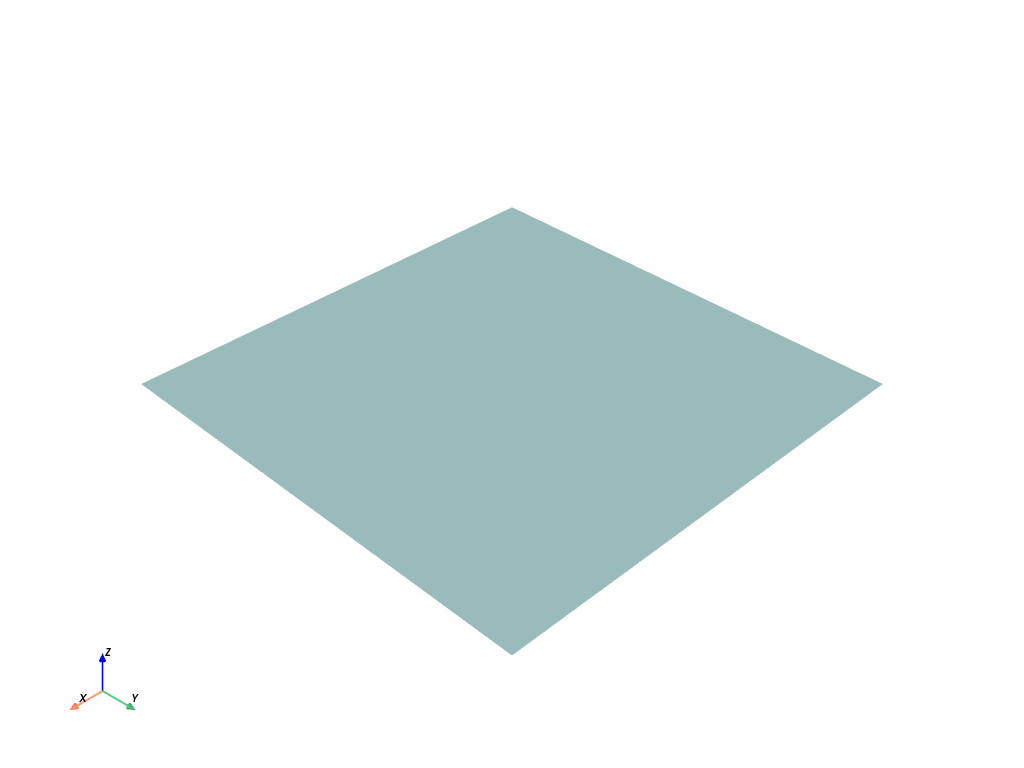

In [1]:
import numpy as np
import pyvista as pv

pv.global_theme.jupyter_backend = 'static'

# 1) 정사각형 꼭짓점 정의 (XY 평면 상에 위치)
vertices = np.array([
    [0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0],
    [0.0, 1.0, 0.0]
])

# 2) faces 배열: 정사각형을 하나의 셀로 정의
#  [4, idx0, idx1, idx2, idx3] 형태로 구성 (4는 꼭짓점 개수)
faces = np.hstack([[4, 0, 1, 2, 3]])

# 3) PolyData 생성
square = pv.PolyData(vertices, faces)

square.plot()

In [2]:
help(square.extrude)

Help on method extrude in module pyvista.core.filters.poly_data:

extrude(vector, capping=None, inplace=False, progress_bar=False) method of pyvista.core.pointset.PolyData instance
    Sweep polygonal data creating a "skirt" from free edges.
    
    This will create a line from vertices.
    
    This takes polygonal data as input and generates polygonal
    data on output. The input dataset is swept according to some
    extrusion function and creates new polygonal primitives. These
    primitives form a "skirt" or swept surface. For example,
    sweeping a line results in a quadrilateral, and sweeping a
    triangle creates a "wedge".
    
    The skirt is generated by locating certain topological
    features. Free edges (edges of polygons or triangle strips
    only used by one polygon or triangle strips) generate
    surfaces. This is true also of lines or polylines. Vertices
    generate lines.
    
    .. versionchanged:: 0.32.0
       The ``capping`` keyword was added with a d

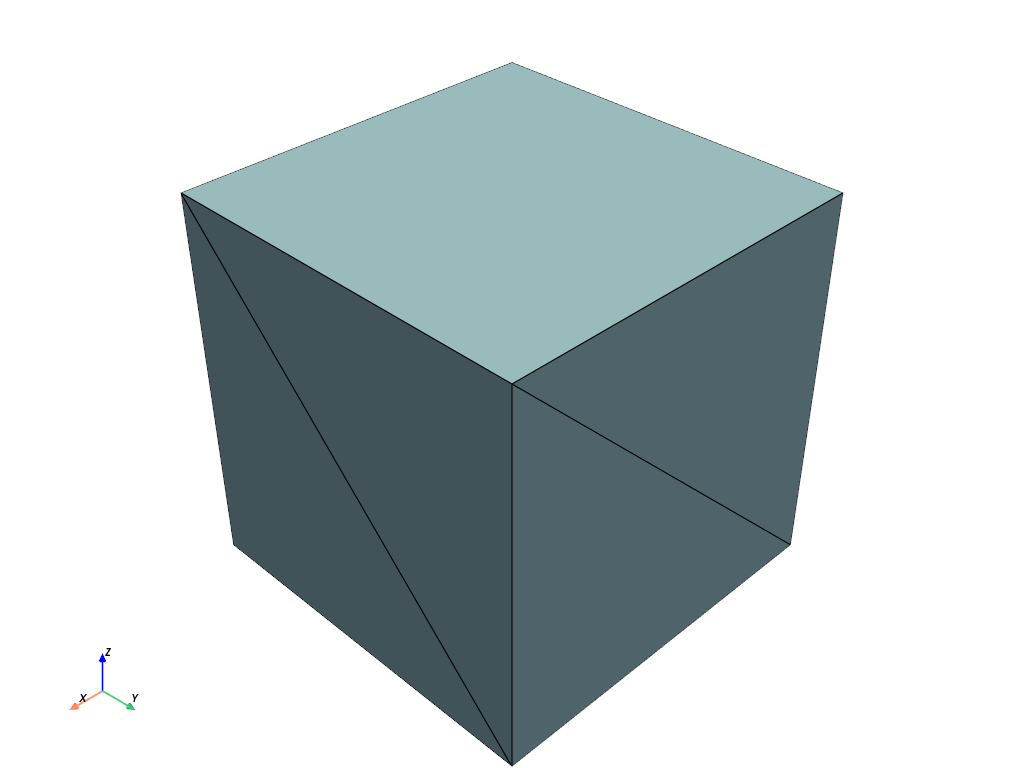

In [3]:
extruded = square.extrude((0, 0, 1), capping=True)
extruded.plot(show_edges=True)

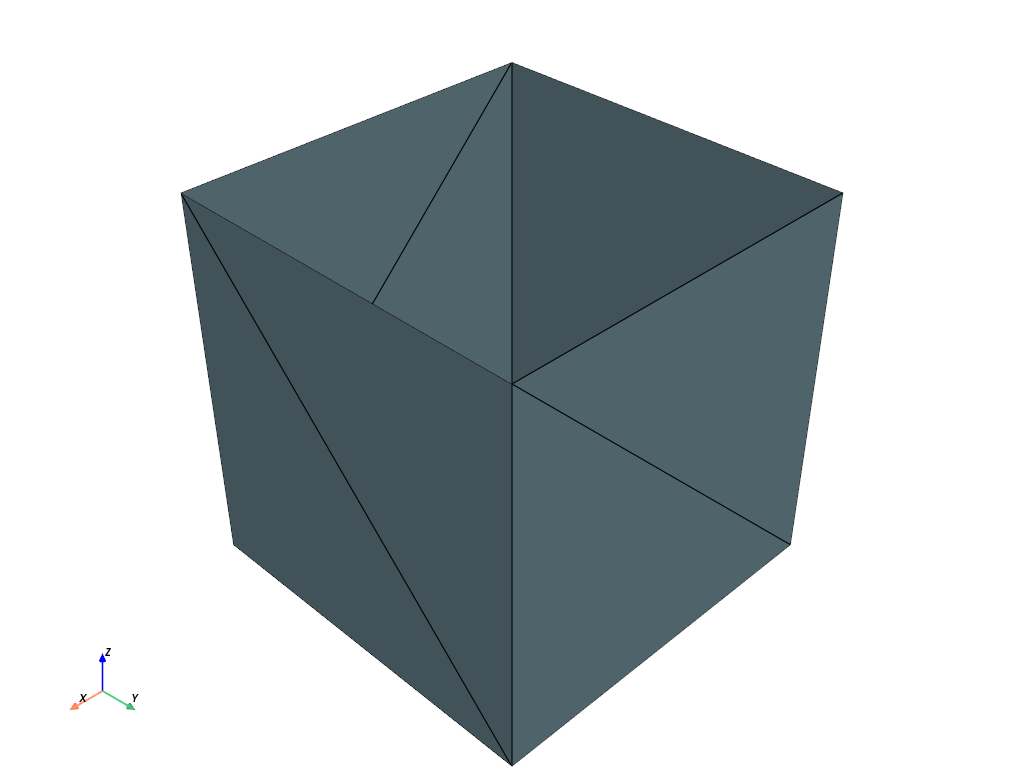

In [4]:
# capping 을 비활성화 시키면 뚜껑이 만들어지지 않음
extruded = square.extrude((0, 0, 1), capping=False)
extruded.plot(show_edges=True)